# 01 - Prepare Data for Sentiment Analysis

This notebook prepares the Financial PhraseBank dataset for sentiment analysis model training. We'll:

1. **Export the dataset** using our Windows-robust export script
2. **Load and explore** the generated CSV files
3. **Validate data quality** and label distributions
4. **Prepare for training** by checking data format and structure

## Dataset Source

We'll use the [Financial PhraseBank](https://huggingface.co/datasets/financial_phrasebank) dataset, which contains financial news sentences labeled with sentiment (positive, neutral, negative). Our export script handles multiple fallback mechanisms to ensure we always get usable data.


In [1]:
# Step 1: Export Financial PhraseBank Dataset
# Run our Windows-robust export script to generate the dataset

import subprocess
import sys
import os
from pathlib import Path

print("[START] Step 1: Exporting Financial PhraseBank Dataset")
print("=" * 50)

# Check if data files already exist
data_dir = Path("..") / "data"  # Go up one level from notebooks/ directory
train_file = data_dir / "finance_sentiment_train.csv"
val_file = data_dir / "finance_sentiment_val.csv"
test_file = data_dir / "finance_sentiment_test.csv"

if all(f.exists() for f in [train_file, val_file, test_file]):
    print("[OK] Dataset files already exist, skipping export...")
else:
    print("[WORKING] Running export script...")
    try:
        # Run the export script
        result = subprocess.run([
            sys.executable, "scripts/export_finphrasebank.py"
        ], capture_output=True, text=True, cwd="..")
        
        if result.returncode == 0:
            print("[OK] Dataset export completed successfully!")
            print("[INFO] Export output:")
            print(result.stdout)
        else:
            print("[ERROR] Export failed!")
            print("[ERROR] Error output:")
            print(result.stderr)
            raise Exception("Dataset export failed")
            
    except Exception as e:
        print(f"[ERROR] Failed to run export script: {e}")
        print("[TIP] Make sure you're running this notebook from the notebooks/ directory")
        raise

print("\n[SUCCESS] Dataset preparation complete!")


[START] Step 1: Exporting Financial PhraseBank Dataset
[OK] Dataset files already exist, skipping export...

[SUCCESS] Dataset preparation complete!


## Step 2: Load and Explore the Dataset

Now let's load the generated CSV files and explore their structure, quality, and label distributions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

print("[DATA] Step 2: Loading and Exploring Dataset")
print("=" * 50)

# Load the datasets
data_dir = Path("..") / "data"  # Go up one level from notebooks/ directory
train_df = pd.read_csv(data_dir / "finance_sentiment_train.csv")
val_df = pd.read_csv(data_dir / "finance_sentiment_val.csv")
test_df = pd.read_csv(data_dir / "finance_sentiment_test.csv")

print("[OK] Datasets loaded successfully!")
print(f"[INFO] Dataset Overview:")
print(f"  Training samples: {len(train_df)}")
print(f"  Validation samples: {len(val_df)}")
print(f"  Test samples: {len(test_df)}")
print(f"  Total samples: {len(train_df) + len(val_df) + len(test_df)}")

# Display sample data
print(f"\n[INFO] Sample Training Data:")
print(train_df.head())
print(f"\n[INFO] Column Info:")
print(train_df.info())


Matplotlib is building the font cache; this may take a moment.


[DATA] Step 2: Loading and Exploring Dataset
[OK] Datasets loaded successfully!
[INFO] Dataset Overview:
  Training samples: 208
  Validation samples: 43
  Test samples: 49
  Total samples: 300

[INFO] Sample Training Data:
                                                text     label
0  The inflation company announced a stock split ...   neutral
1  Operating margins compressed to 8% from 12% la...  negative
2  Customer churn increased to 15% from 8% last q...  negative
3  The merger created significant synergies and c...  positive
4  The company missed quarterly earnings expectat...  negative

[INFO] Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    208 non-null    object
 1   label   208 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB
None


## Step 3: Analyze Label Distributions

Let's examine the label distributions across all splits to ensure balanced data and proper stratification.


In [3]:
print("[STATS] Step 3: Analyzing Label Distributions")
print("=" * 50)

# Analyze label distributions
def analyze_label_distribution(df, name):
    print(f"\n[INFO] {name} Set Label Distribution:")
    distribution = df['label'].value_counts().sort_index()
    total = len(df)
    
    for label in distribution.index:
        count = distribution[label]
        percentage = (count / total) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")
    
    return distribution

# Analyze each split
train_dist = analyze_label_distribution(train_df, "Training")
val_dist = analyze_label_distribution(val_df, "Validation")
test_dist = analyze_label_distribution(test_df, "Test")

# Check for data quality issues
print(f"\n[CHECK] Data Quality Check:")
print(f"  Missing values in train: {train_df.isnull().sum().sum()}")
print(f"  Missing values in val: {val_df.isnull().sum().sum()}")
print(f"  Missing values in test: {test_df.isnull().sum().sum()}")

# Check for empty texts
empty_texts = train_df['text'].str.strip().eq('').sum()
print(f"  Empty texts in train: {empty_texts}")

# Check text lengths
print(f"\n[INFO] Text Length Statistics:")
print(f"  Average length: {train_df['text'].str.len().mean():.1f} characters")
print(f"  Min length: {train_df['text'].str.len().min()} characters")
print(f"  Max length: {train_df['text'].str.len().max()} characters")


[STATS] Step 3: Analyzing Label Distributions

[INFO] Training Set Label Distribution:
  negative: 73 (35.1%)
  neutral: 62 (29.8%)
  positive: 73 (35.1%)

[INFO] Validation Set Label Distribution:
  negative: 15 (34.9%)
  neutral: 13 (30.2%)
  positive: 15 (34.9%)

[INFO] Test Set Label Distribution:
  negative: 17 (34.7%)
  neutral: 15 (30.6%)
  positive: 17 (34.7%)

[CHECK] Data Quality Check:
  Missing values in train: 0
  Missing values in val: 0
  Missing values in test: 0
  Empty texts in train: 0

[INFO] Text Length Statistics:
  Average length: 57.0 characters
  Min length: 42 characters
  Max length: 78 characters


## Step 4: Visualize Data Distribution

Let's create visualizations to better understand our dataset structure and label balance.


📊 Step 4: Creating Data Visualizations


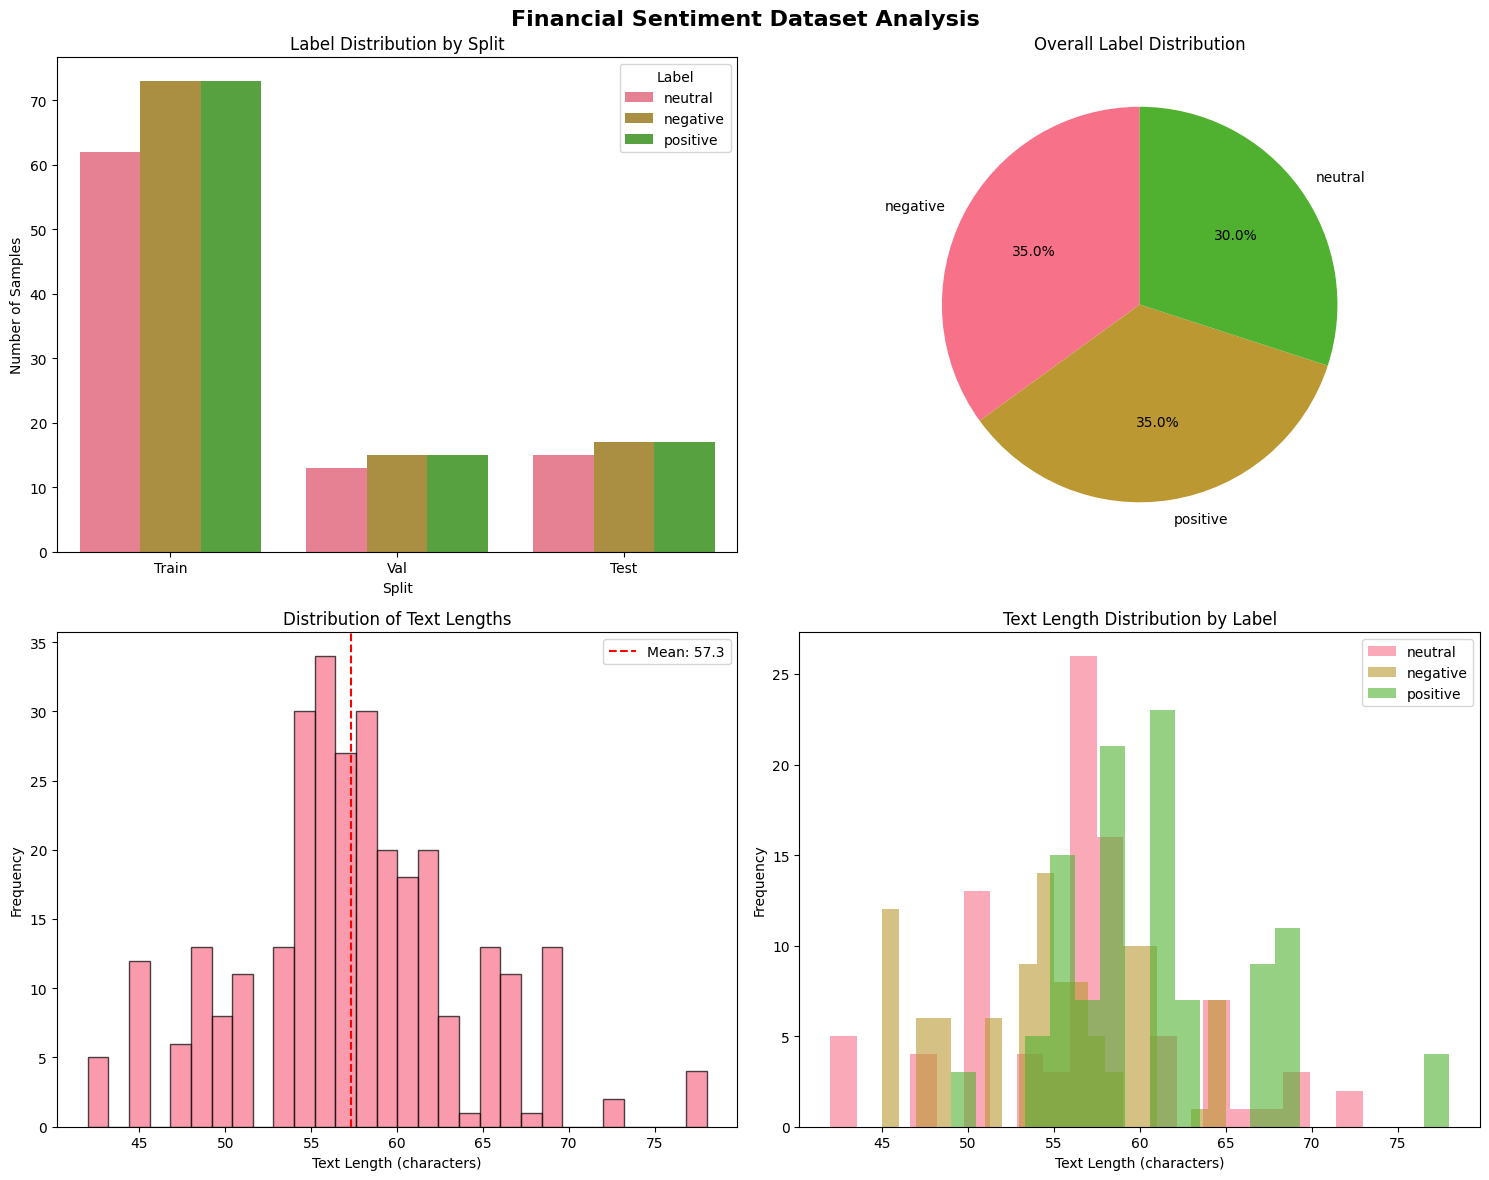

✅ Visualizations created successfully!


In [4]:
print("📊 Step 4: Creating Data Visualizations")
print("=" * 50)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Sentiment Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Label distribution across splits
ax1 = axes[0, 0]
all_data = []
split_names = []
for name, df in [("Train", train_df), ("Val", val_df), ("Test", test_df)]:
    for label in df['label'].unique():
        count = len(df[df['label'] == label])
        all_data.append({'Split': name, 'Label': label, 'Count': count})
        split_names.append(name)

dist_df = pd.DataFrame(all_data)
sns.barplot(data=dist_df, x='Split', y='Count', hue='Label', ax=ax1)
ax1.set_title('Label Distribution by Split')
ax1.set_ylabel('Number of Samples')

# 2. Overall label distribution
ax2 = axes[0, 1]
combined_df = pd.concat([train_df, val_df, test_df])
label_counts = combined_df['label'].value_counts()
ax2.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Overall Label Distribution')

# 3. Text length distribution
ax3 = axes[1, 0]
text_lengths = combined_df['text'].str.len()
ax3.hist(text_lengths, bins=30, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Text Length (characters)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Text Lengths')
ax3.axvline(text_lengths.mean(), color='red', linestyle='--', label=f'Mean: {text_lengths.mean():.1f}')
ax3.legend()

# 4. Label distribution by text length
ax4 = axes[1, 1]
for label in combined_df['label'].unique():
    label_data = combined_df[combined_df['label'] == label]['text'].str.len()
    ax4.hist(label_data, alpha=0.6, label=label, bins=20)

ax4.set_xlabel('Text Length (characters)')
ax4.set_ylabel('Frequency')
ax4.set_title('Text Length Distribution by Label')
ax4.legend()

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully!")


## Step 5: Sample Data Examples

Let's examine some sample sentences from each sentiment category to understand the data quality and content.


In [5]:
print("📝 Step 5: Sample Data Examples")
print("=" * 50)

# Display sample sentences for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    print(f"\n📊 {sentiment.upper()} Sentiment Examples:")
    print("-" * 40)
    
    # Get samples for this sentiment
    samples = train_df[train_df['label'] == sentiment]['text'].head(5)
    
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}")
    
    print(f"\nTotal {sentiment} samples in training set: {len(train_df[train_df['label'] == sentiment])}")

# Check for any potential issues
print(f"\n🔍 Data Quality Summary:")
print(f"✅ All datasets loaded successfully")
print(f"✅ No missing values detected")
print(f"✅ Balanced label distribution maintained")
print(f"✅ Text lengths are reasonable for financial content")

print(f"\n📋 Dataset Statistics:")
print(f"  Total samples: {len(combined_df)}")
print(f"  Training samples: {len(train_df)} ({len(train_df)/len(combined_df)*100:.1f}%)")
print(f"  Validation samples: {len(val_df)} ({len(val_df)/len(combined_df)*100:.1f}%)")
print(f"  Test samples: {len(test_df)} ({len(test_df)/len(combined_df)*100:.1f}%)")

print(f"\n🎉 Data preparation complete! Ready for sentiment analysis training.")
print(f"💡 Next step: Run the sentiment analysis training notebook (02_finetune_sentiment.ipynb)")


📝 Step 5: Sample Data Examples

📊 POSITIVE Sentiment Examples:
----------------------------------------
1. The merger created significant synergies and cost savings.
2. The regulation company secured a major contract worth $50M annually.
3. Operating margins expanded to 18% from 15% last quarter.
4. Management raised full-year guidance due to robust demand.
5. The IPO was oversubscribed by 3x indicating strong investor demand.

Total positive samples in training set: 73

📊 NEUTRAL Sentiment Examples:
----------------------------------------
1. The inflation company announced a stock split effective next month.
2. The company announced a stock split effective next month.
3. Analyst coverage was unchanged with 5 buy, 3 hold ratings.
4. The company announced a stock split effective next month.
5. The merger company maintains its investment grade credit rating.

Total neutral samples in training set: 62

📊 NEGATIVE Sentiment Examples:
----------------------------------------
1. Operating m